<a href="https://www.kaggle.com/code/samithsachidanandan/bike-sharing-demand-analysis-regression?scriptVersionId=234463443" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bike Sharing Demand Analysis (Regression)

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

### Dataset Information


#### Data Set

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

#### Associated tasks


	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


#### Files


	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


#### Dataset characteristics
	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	


| Column Name | Description |
|-------------|-------------|
| **instant** | Record index |
| **dteday** | Date |
| **season** | Season (1: springer, 2: summer, 3: fall, 4: winter) |
| **yr** | Year (0: 2011, 1: 2012) |
| **mnth** | Month (1 to 12) |
| **hr** | Hour (0 to 23) |
| **holiday** | Whether the day is a holiday (based on [DC holiday schedule](http://dchr.dc.gov/page/holiday-schedule)) |
| **weekday** | Day of the week |
| **workingday** | If day is neither weekend nor holiday (1 = working day, 0 = otherwise) |
| **weathersit** | Weather situation:<br>1: Clear, Few clouds, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| **temp** | Normalized temperature in Celsius (divided by 41) |
| **atemp** | Normalized feeling temperature in Celsius (divided by 50) |
| **hum** | Normalized humidity (divided by 100) |
| **windspeed** | Normalized wind speed (divided by 67) |
| **casual** | Count of casual users |
| **registered** | Count of registered users |
| **cnt** | Count of total rental bikes (casual + registered) |


## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import missingno as msno
plt.style.use('fivethirtyeight')
pd.options.display.max_columns =999

## Loading the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/uci-bike-sharing-data/hour.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 17)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Basic Statistics¶

In [6]:
# Statsticsl info 
df.describe().style.background_gradient(cmap = "Blues")

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.000000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.029500,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# Dtypes info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
#Null Values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [10]:
(df.isnull().sum() / len(df)) * 100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
#Unique Values 
df.apply(lambda x : len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

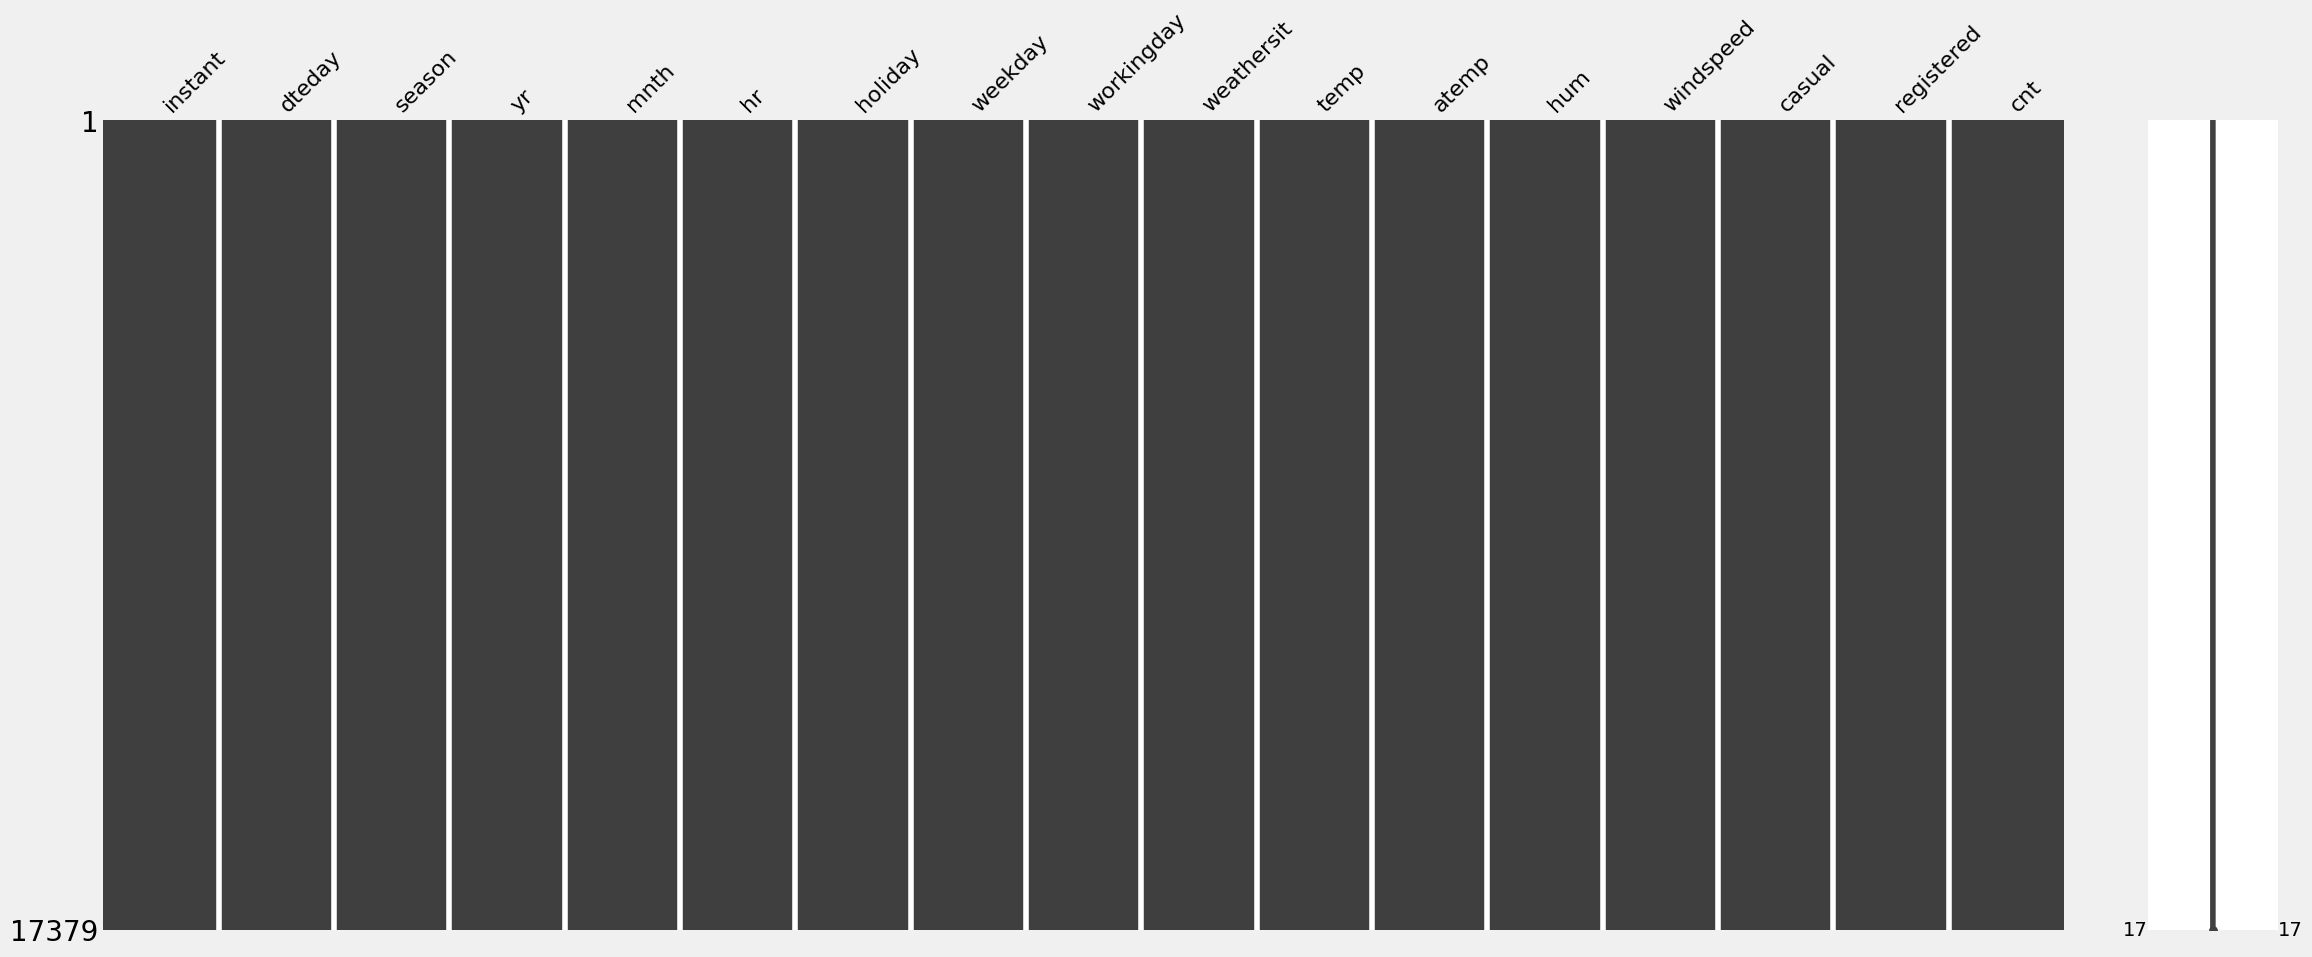

In [12]:
# Create a Matrix Plot
msno.matrix(df)
plt.show()

## Preprocessing the Dataset 

In [13]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [15]:
# Change int columns to category 

cols = ['season','month','hour', 'holiday','weekday', 'workingday', 'weather' ]

for col in cols: 
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis 

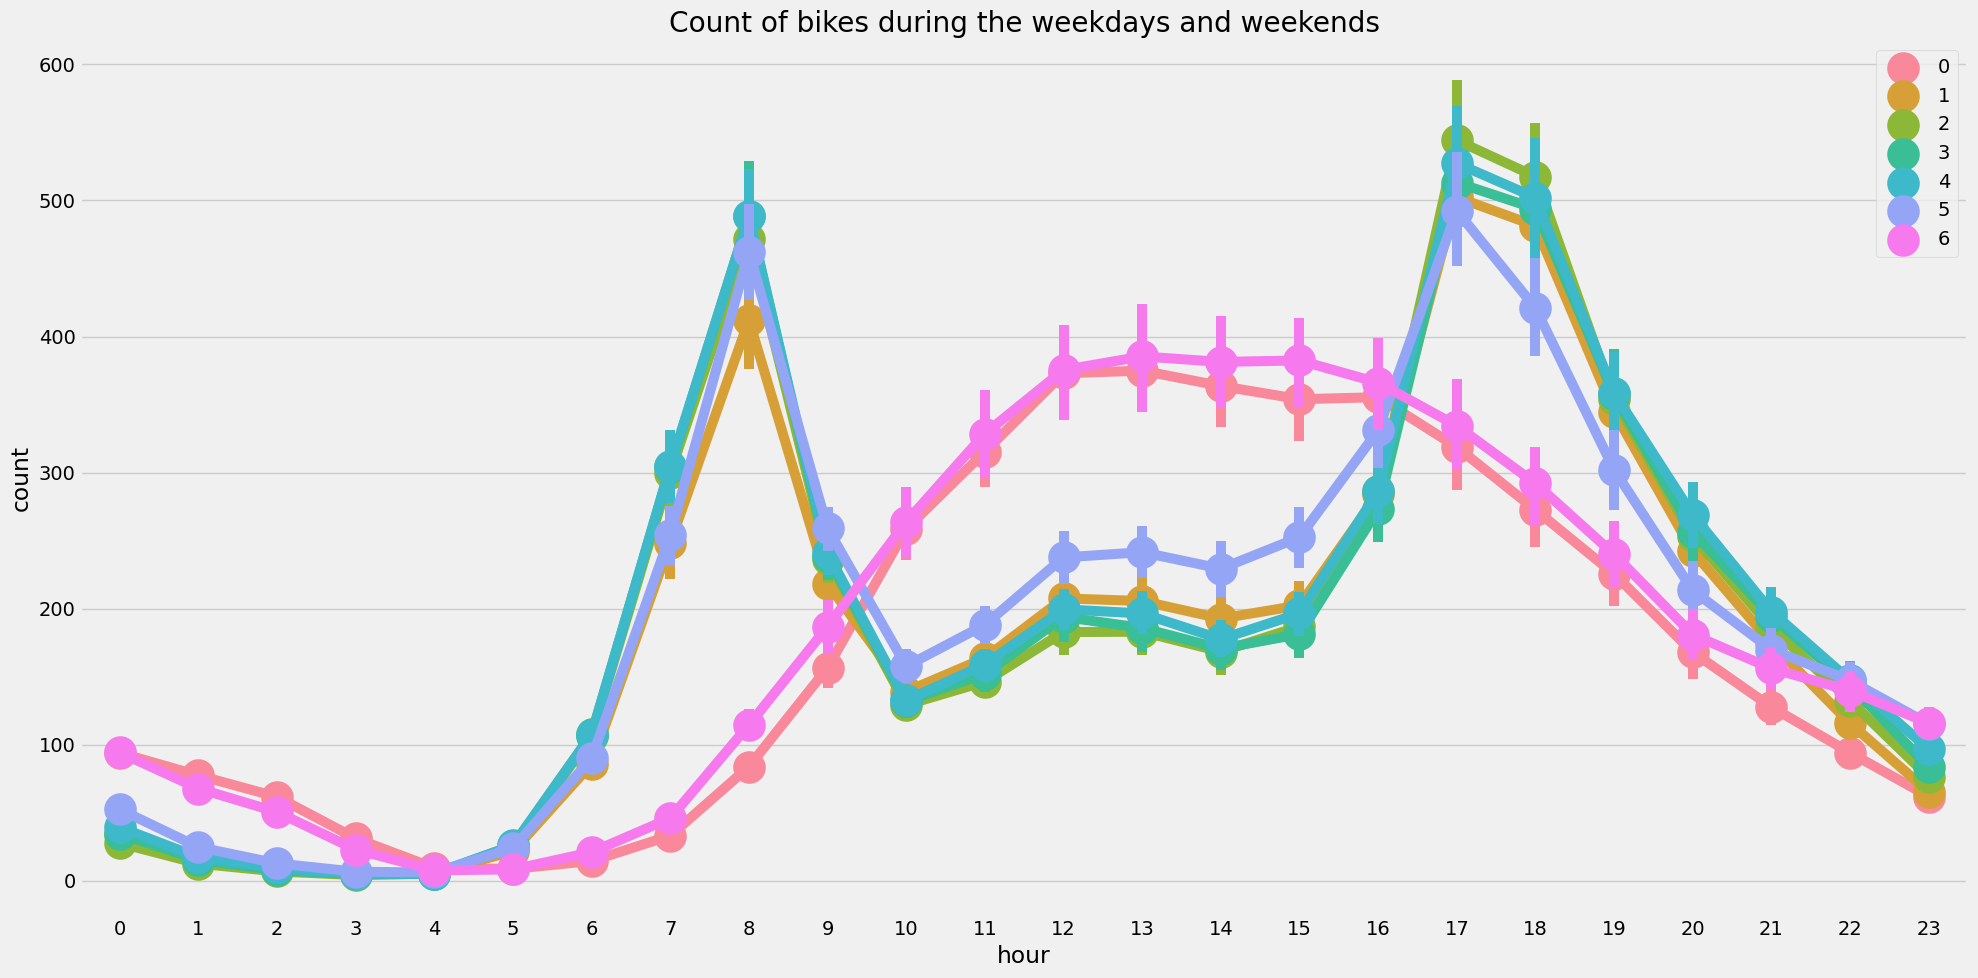

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y = 'count', hue='weekday', ax = ax )
ax.set(title = 'Count of bikes during the weekdays and weekends')
plt.legend()
plt.tight_layout()
plt.show()

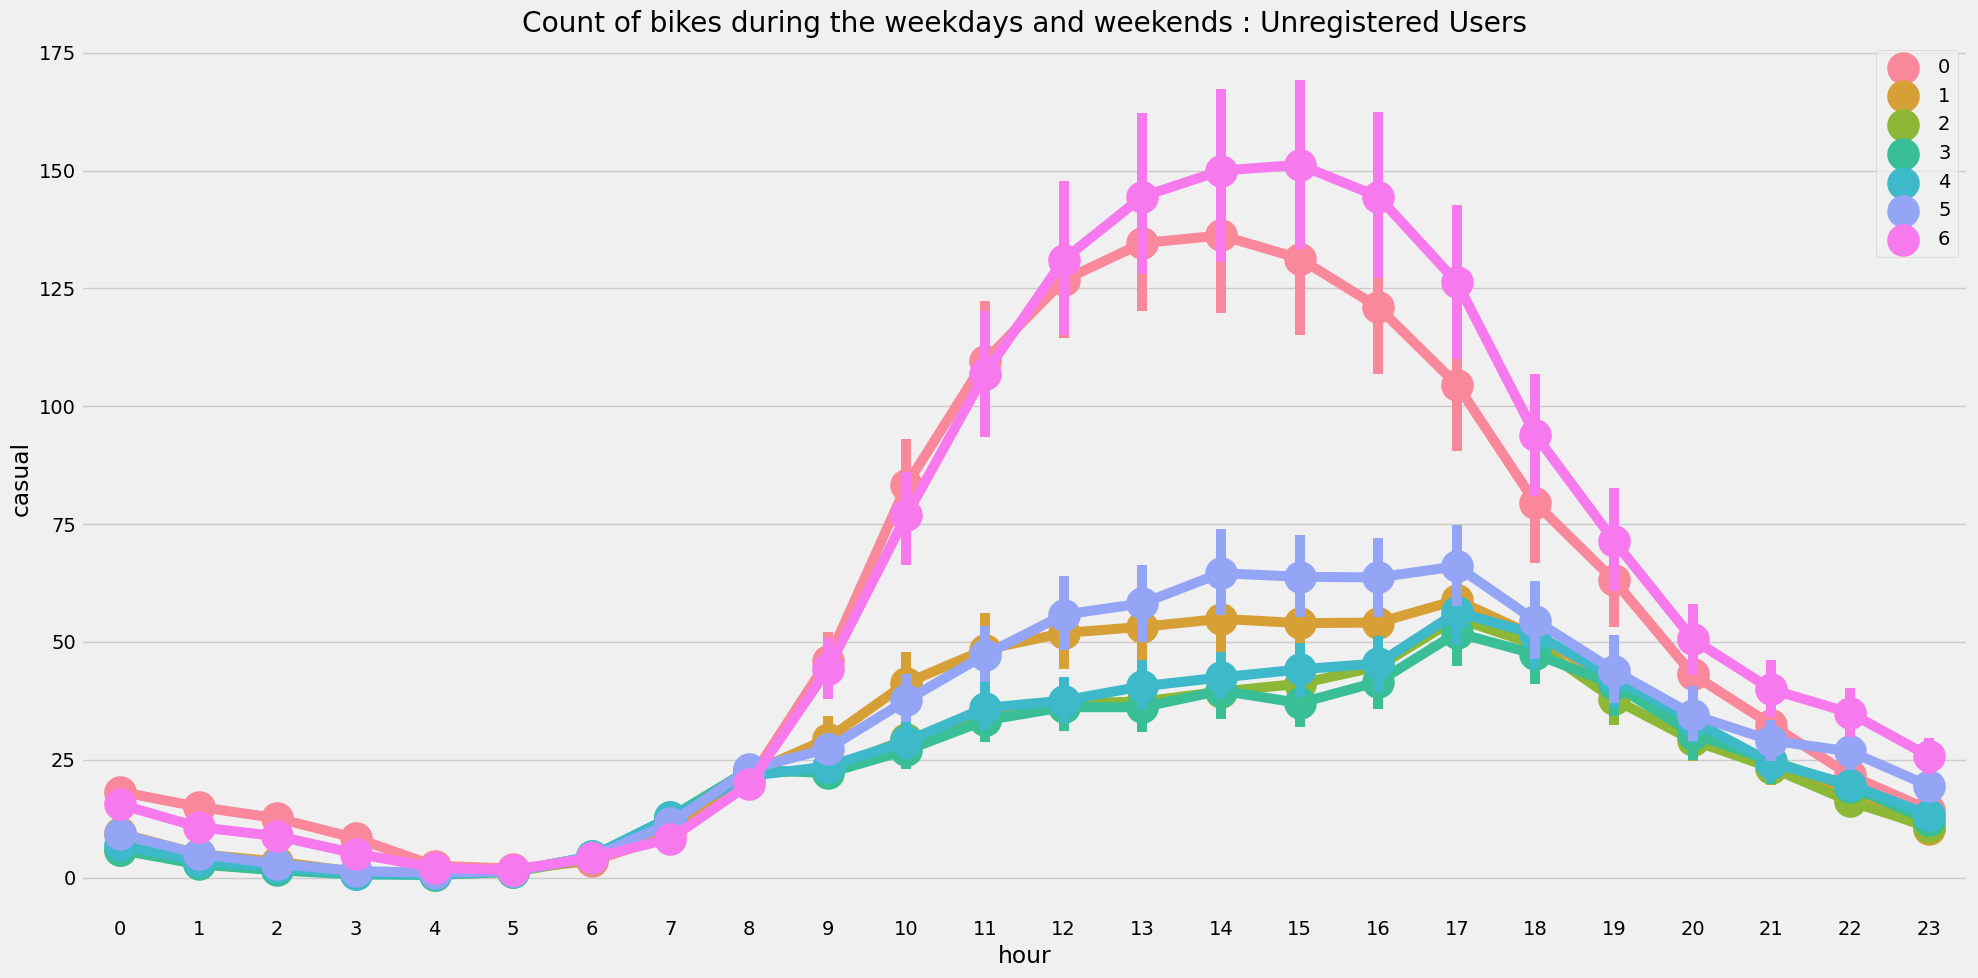

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y = 'casual', hue='weekday', ax = ax )
ax.set(title = 'Count of bikes during the weekdays and weekends : Unregistered Users')
plt.legend()
plt.tight_layout()
plt.show()

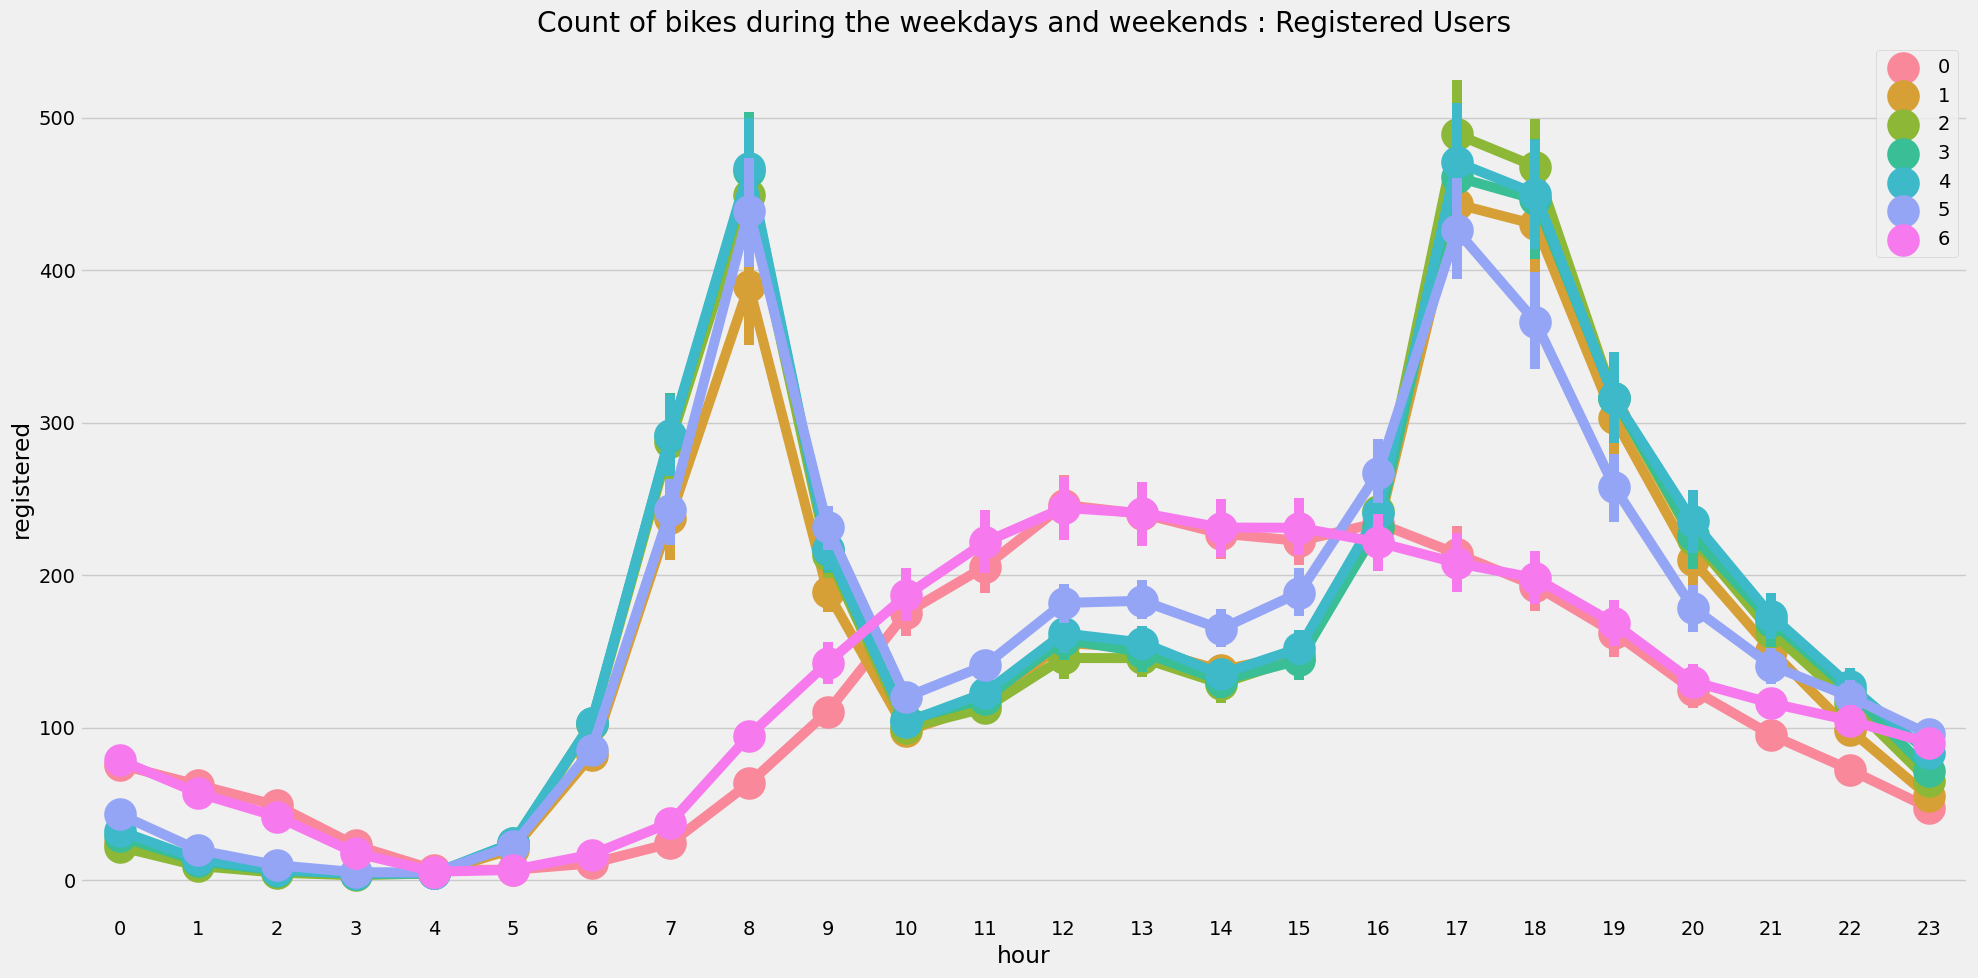

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y = 'registered', hue='weekday', ax = ax )
ax.set(title = 'Count of bikes during the weekdays and weekends : Registered Users')
plt.legend()
plt.tight_layout()
plt.show()

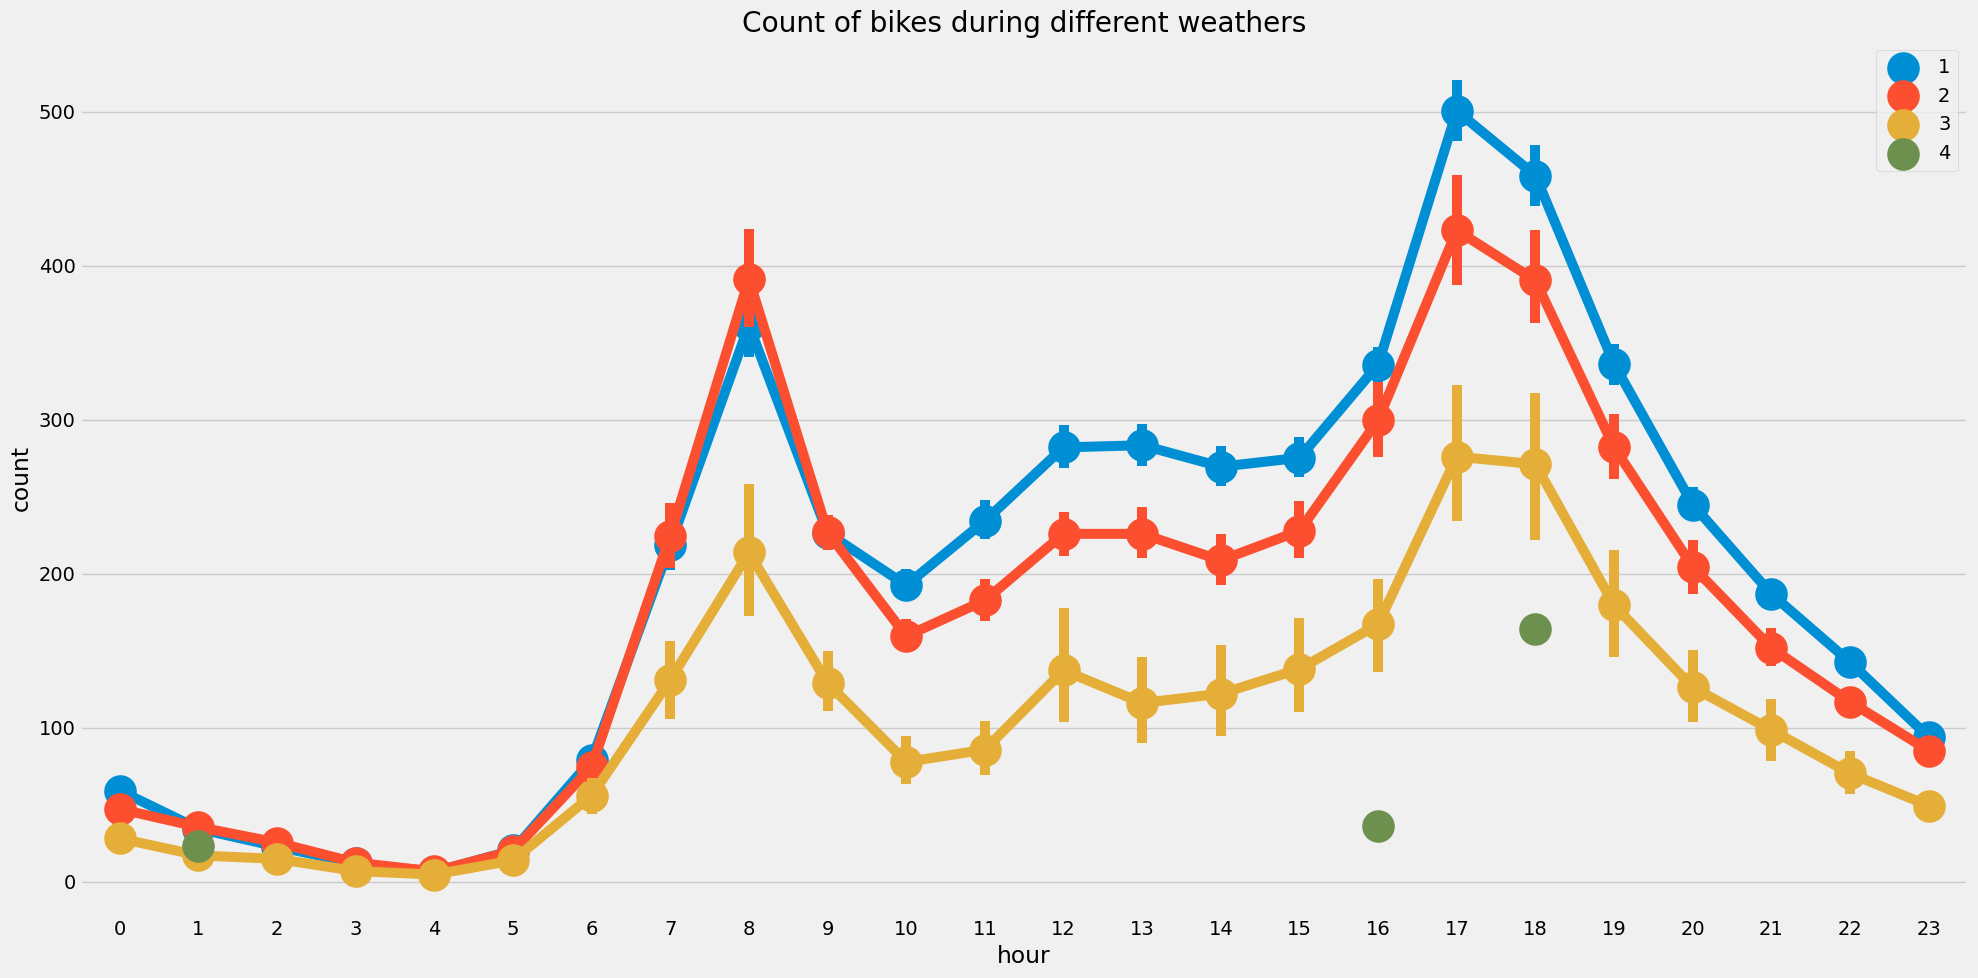

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y = 'count', hue='weather', ax = ax )
ax.set(title = 'Count of bikes during different weathers'  )
plt.legend()
plt.tight_layout()
plt.show()

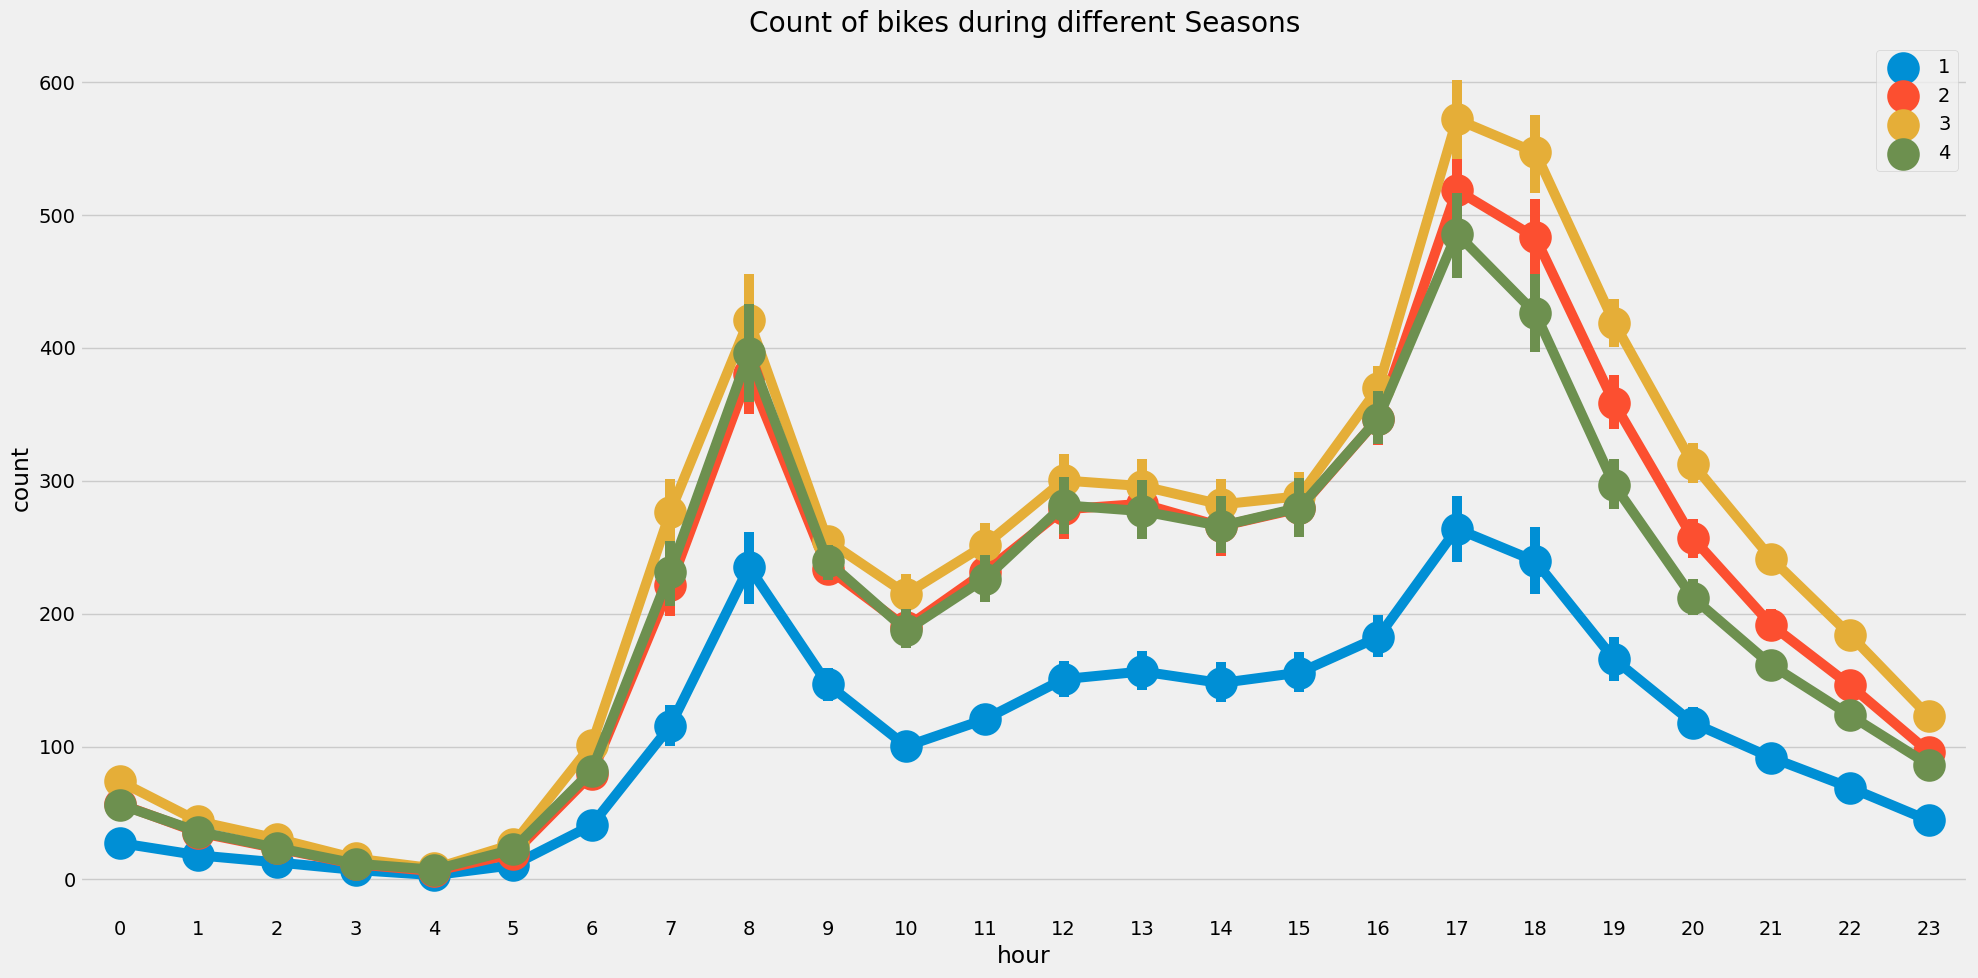

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y = 'count', hue='season', ax = ax )
ax.set(title = 'Count of bikes during different Seasons'  )
plt.legend()
plt.tight_layout()
plt.show()

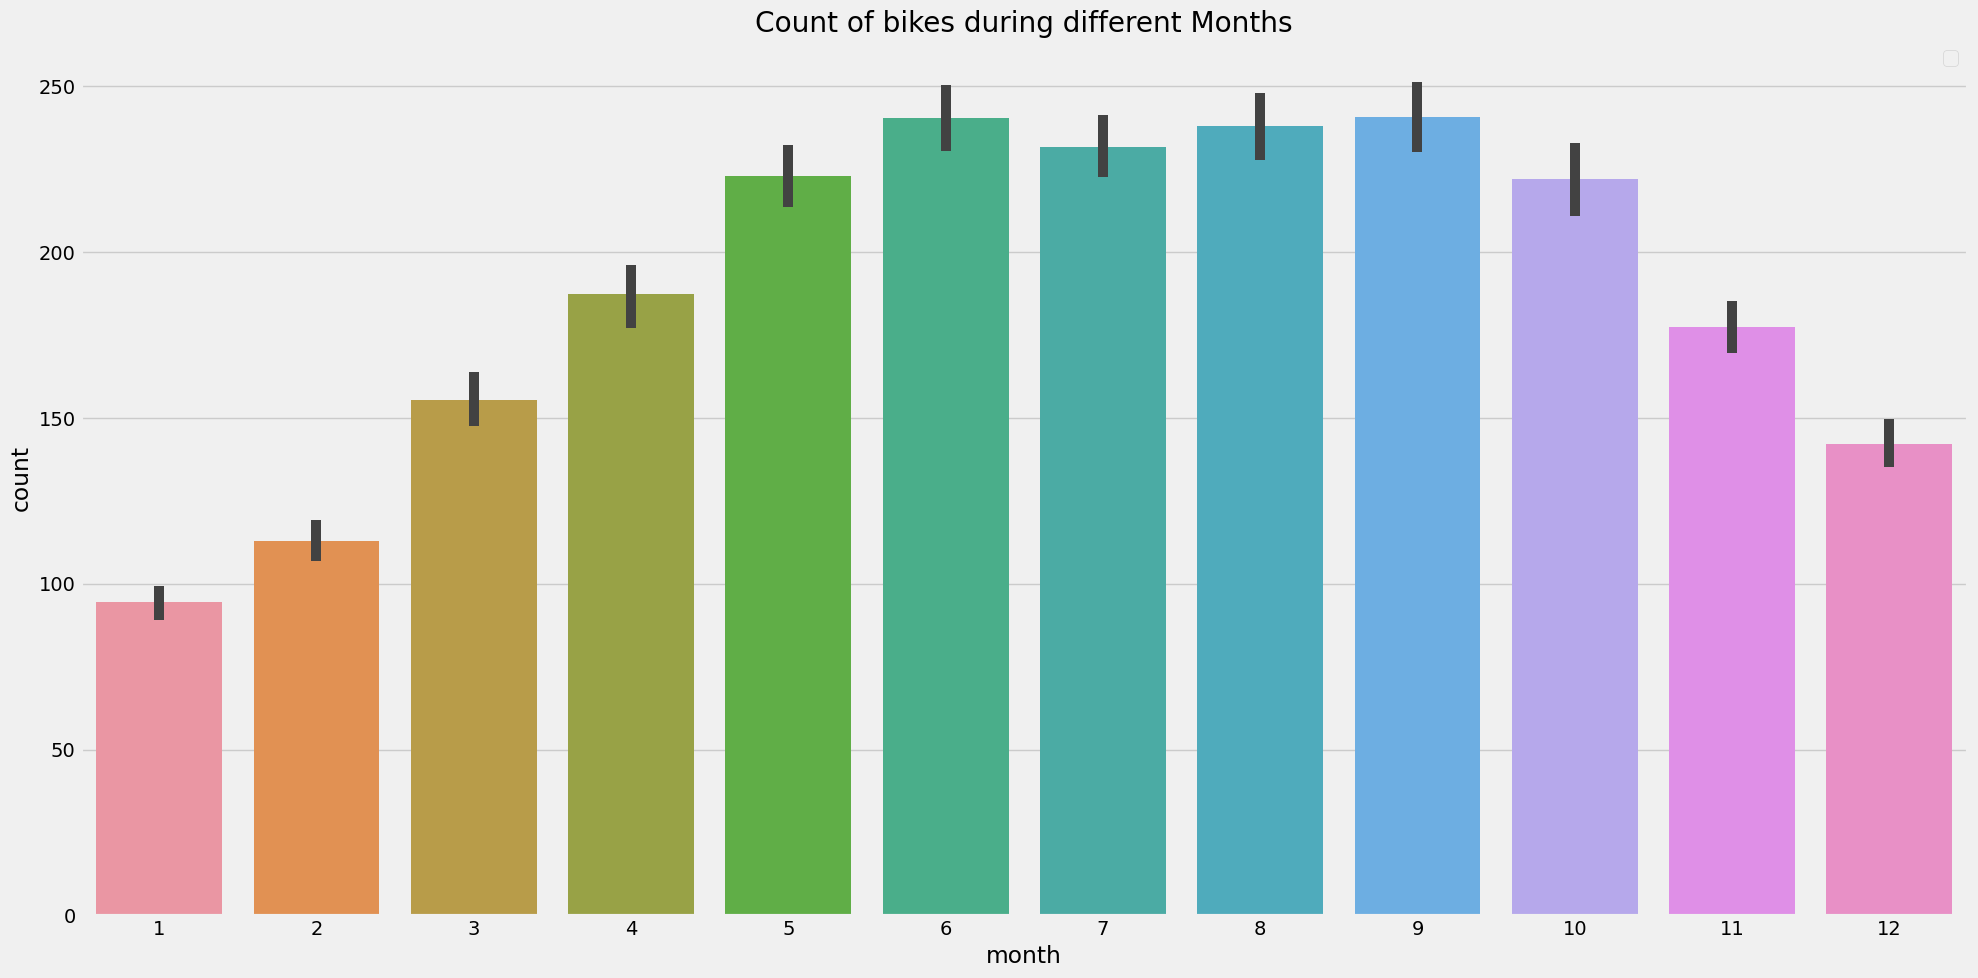

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y = 'count', ax = ax )
ax.set(title = 'Count of bikes during different Months'  )
plt.legend()
plt.tight_layout()
plt.show()

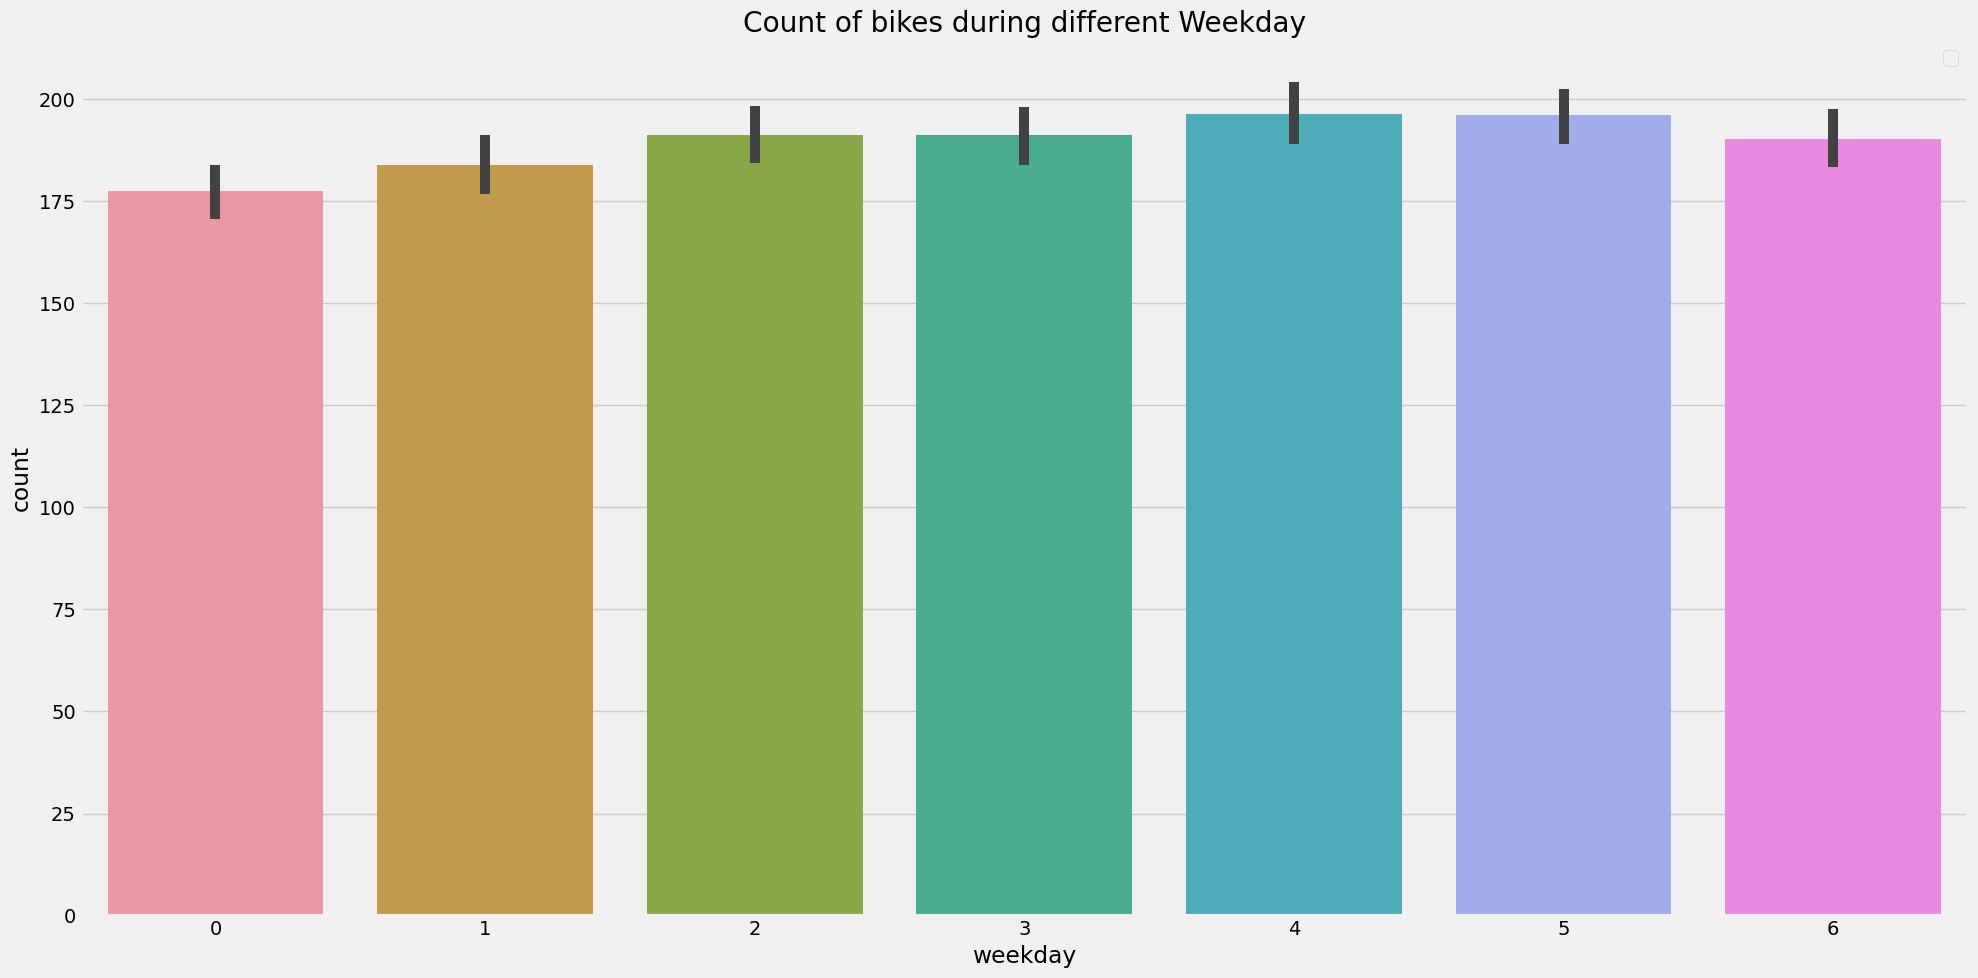

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y = 'count', ax = ax )
ax.set(title = 'Count of bikes during different Weekday'  )
plt.legend()
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Relation between humidity and users')]

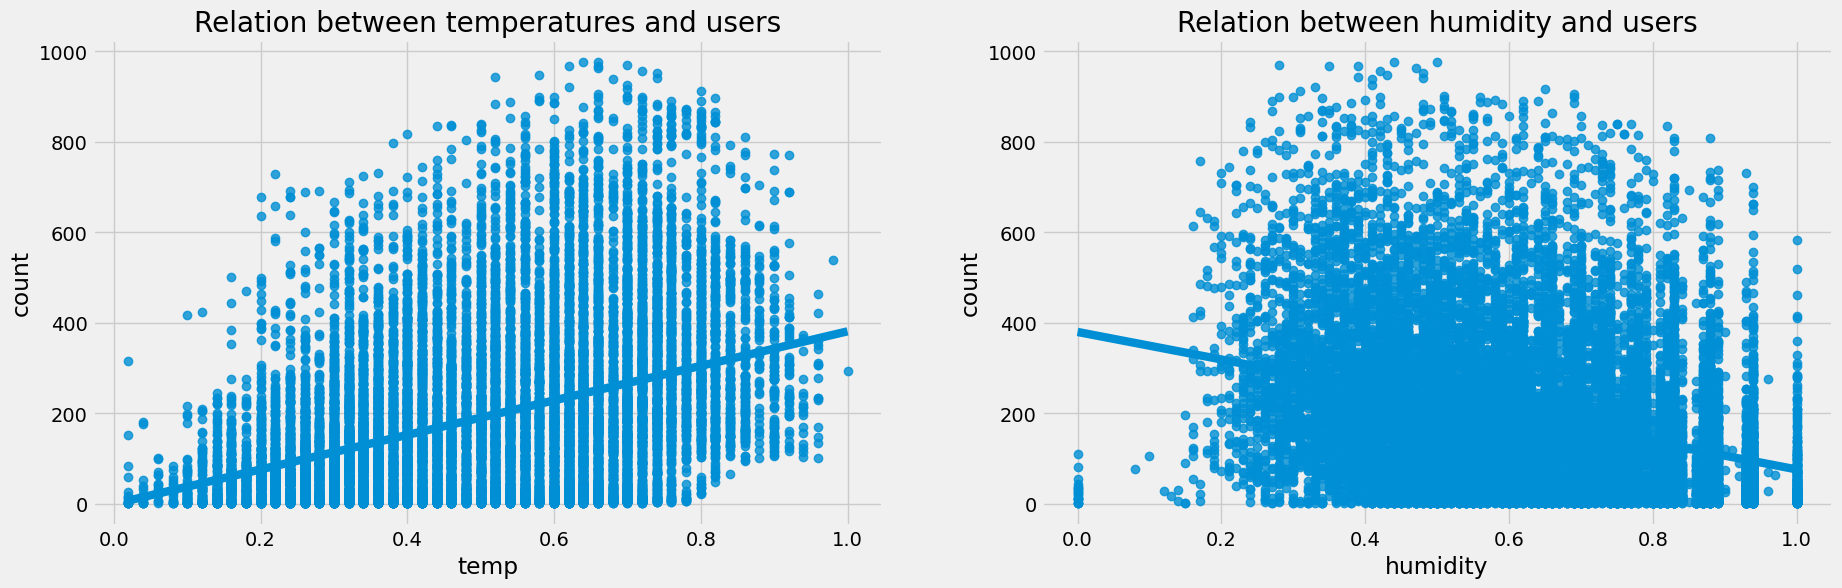

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title = 'Relation between temperatures and users')
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title = 'Relation between humidity and users')

[Text(0.5, 1.0, 'Theoritical Quantiles')]

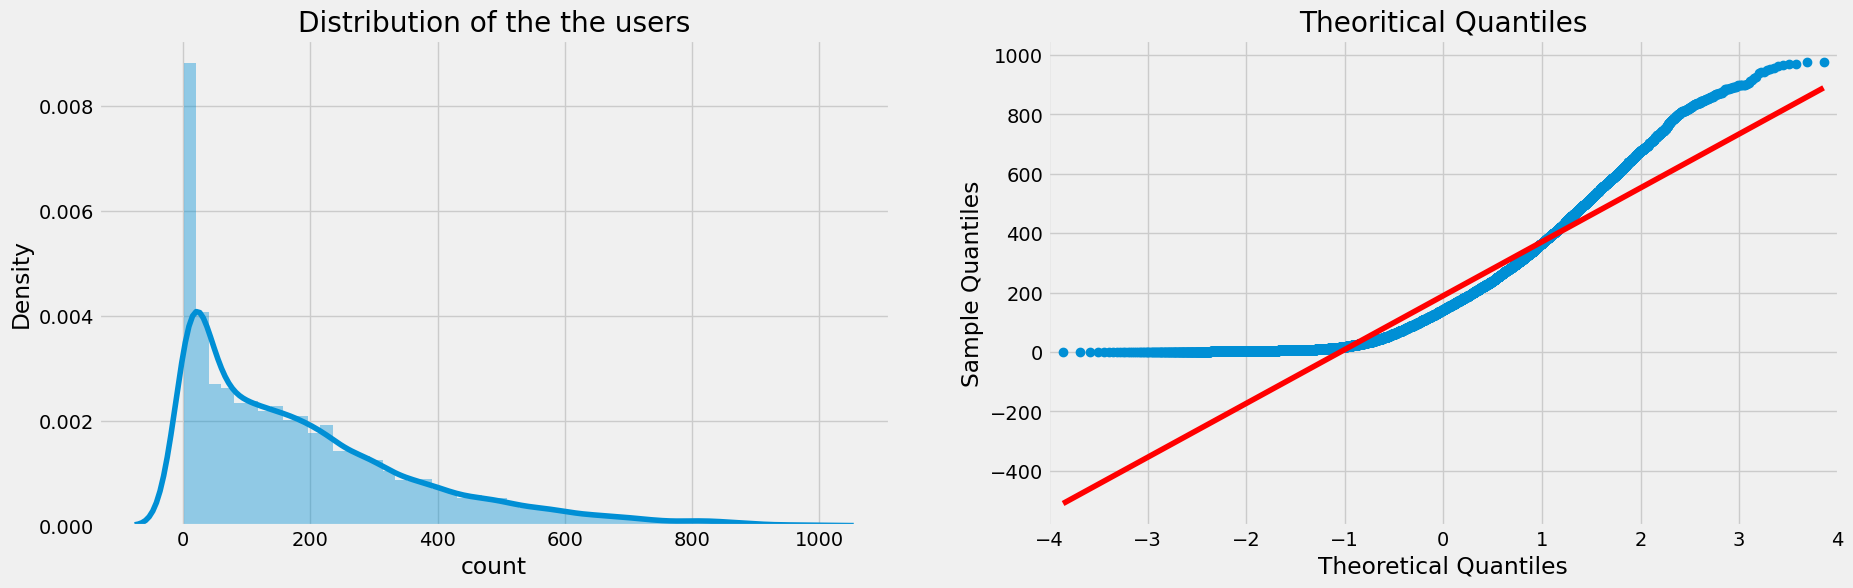

In [24]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title = 'Distribution of the the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title = 'Theoritical Quantiles')

## Log Transformation 

In [25]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical Quantiles')]

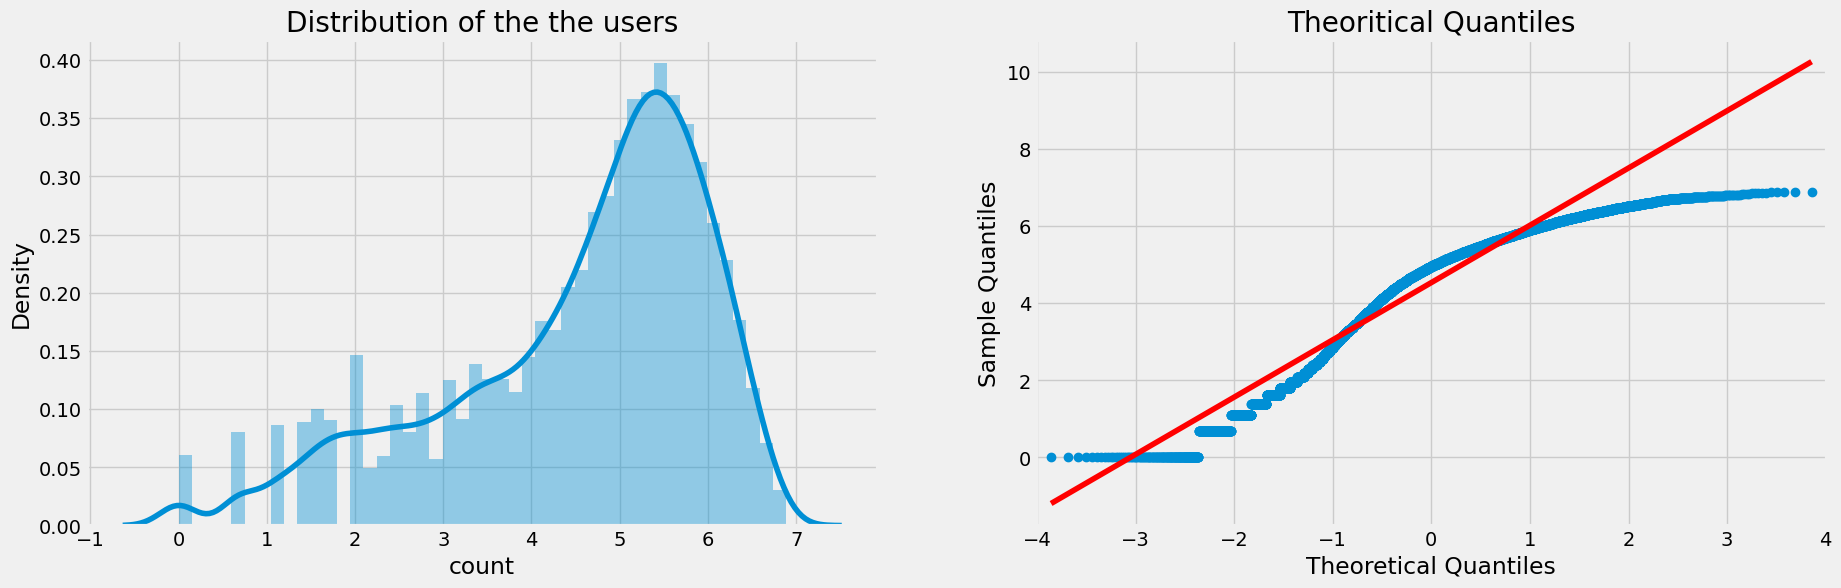

In [26]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title = 'Distribution of the the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title = 'Theoritical Quantiles')

## Coorelation Matrix

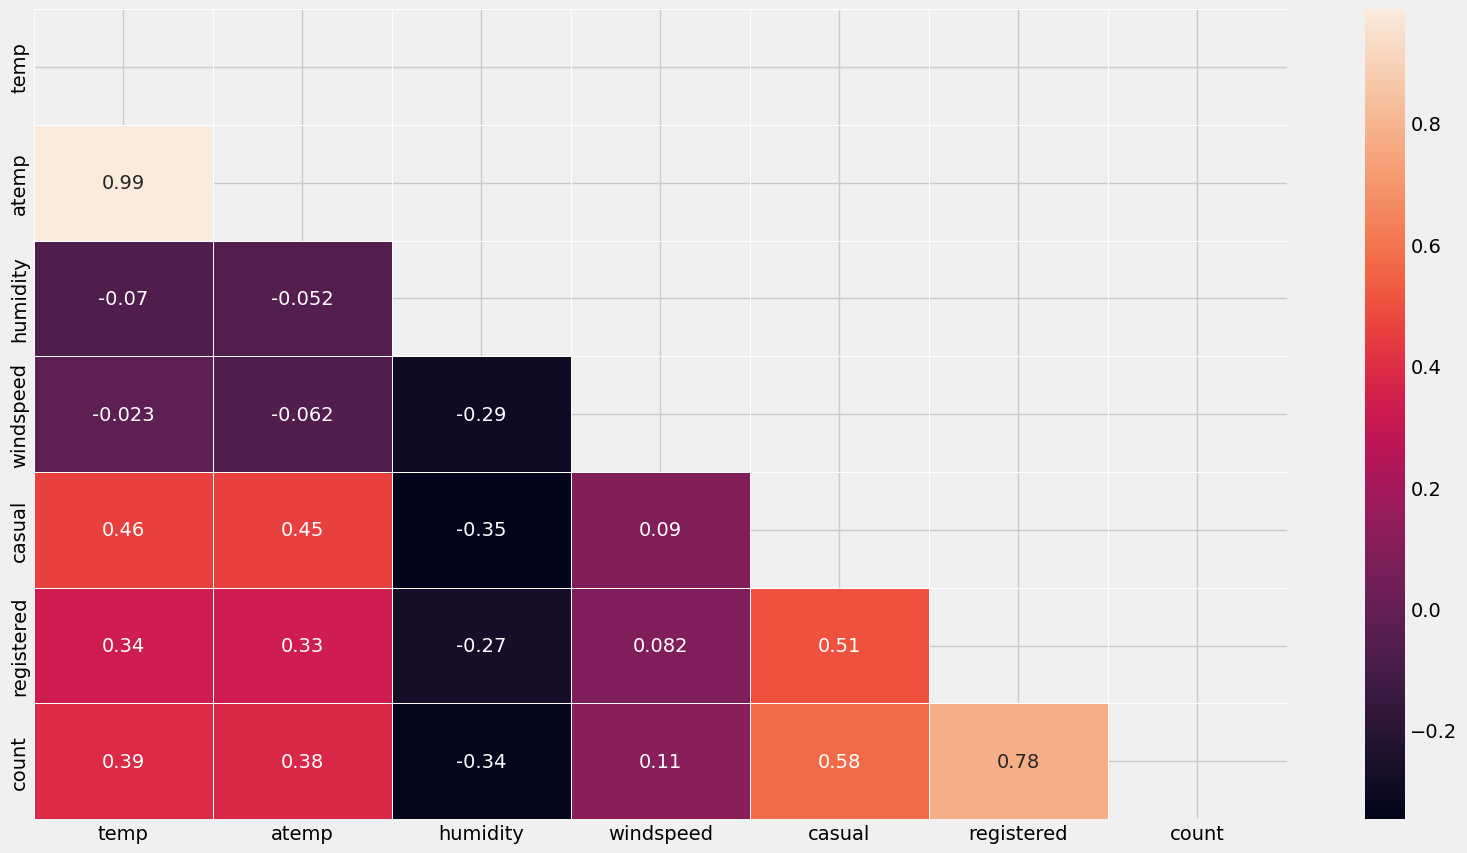

In [27]:
corr = df.corr(numeric_only= True )
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(corr, annot=True, cmap='rocket',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

## One Hot Encoding 

In [28]:
df_new = df

def encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)],axis = 1)
    data = data.drop([column], axis = 1)
    return data

cols = ['season','month','hour', 'holiday','weekday', 'workingday', 'weather' ]

for col in cols: 
    df_new = encoding(df_new, col)
df_new.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.22,0.2727,0.80,0.0,8,32,3.688879,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.22,0.2727,0.80,0.0,5,27,3.465736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.24,0.2879,0.75,0.0,3,10,2.564949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.24,0.2879,0.75,0.0,0,1,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


### Input Split

In [29]:
X = df_new.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count',], axis = 1)
y = df_new['count']

### Model Training

In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
import xgboost as xgb
import lightgbm as lgb

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreeRegressor(),
         GradientBoostingRegressor(),
         xgb.XGBRegressor(), 
         lgb.LGBMRegressor()]        

In [31]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5,shuffle=True, random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [32]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.44849398864964324
Model: Ridge()
CV score: 0.4484090089563205
Model: HuberRegressor()
CV score: 0.46596818692295094
Model: ElasticNetCV()
CV score: 0.4561491813535915
Model: DecisionTreeRegressor()
CV score: 0.4411764733619363
Model: RandomForestRegressor()
CV score: 0.2320837753138655
Model: ExtraTreeRegressor()
CV score: 0.42281083924336305
Model: GradientBoostingRegressor()
CV score: 0.35702811006978274
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
 

### Since we are using neg_mean_squared_error so lower CV score means better. So the best model is LGBMRegressor with the CV score of 0.19197. 

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
model = lgb.LGBMRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 13034, number of used features: 49
[LightGBM] [Info] Start training from score 4.537594


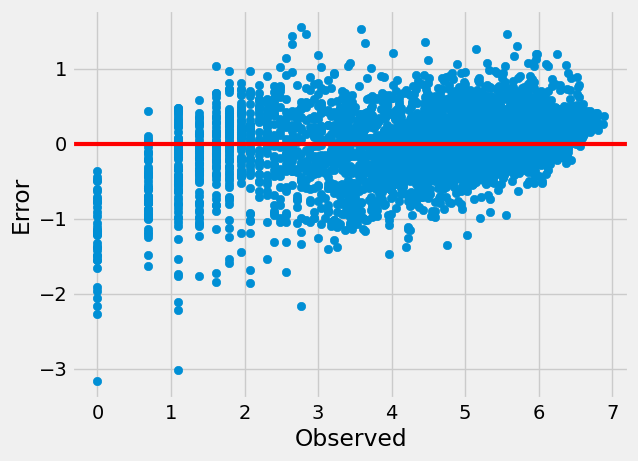

In [35]:
# Plot the error difference 
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color ='red')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.43354287842293576